In [1]:
import pandas as pd

app_train = pd.read_csv(r'C:\Users\Lenovo\Downloads\credit-risk-analytics\data\application_train.csv')
app_test = pd.read_csv(r'C:\Users\Lenovo\Downloads\credit-risk-analytics\data\application_test.csv')
bureau = pd.read_csv(r'C:\Users\Lenovo\Downloads\credit-risk-analytics\data\bureau.csv')
bureau_balance = pd.read_csv(r'C:\Users\Lenovo\Downloads\credit-risk-analytics\data\bureau_balance.csv')
prev_app = pd.read_csv(r'C:\Users\Lenovo\Downloads\credit-risk-analytics\data\previous_application.csv')
cc_bal = pd.read_csv(r'C:\Users\Lenovo\Downloads\credit-risk-analytics\data\credit_card_balance.csv')
installments = pd.read_csv(r'C:\Users\Lenovo\Downloads\credit-risk-analytics\data\installments_payments.csv')
pos_cash = pd.read_csv(r'C:\Users\Lenovo\Downloads\credit-risk-analytics\data\POS_CASH_balance.csv')


# EDA (Exploratory Data Analysis)

In [2]:
dfs = {
    'app_train': app_train,
    'app_test': app_test,
    'bureau': bureau,
    'bureau_balance': bureau_balance,
    'previous_application': prev_app,
    'credit_card_balance': cc_bal,
    'installments_payments': installments,
    'POS_CASH_balance': pos_cash
}

for name, df in dfs.items():
    print(f"{name}: {df.shape} → missing values: {df.isnull().sum().sum()}")


app_train: (307511, 122) → missing values: 9152465
app_test: (48744, 121) → missing values: 1404419
bureau: (1716428, 17) → missing values: 3939947
bureau_balance: (27299925, 3) → missing values: 0
previous_application: (1670214, 37) → missing values: 11109336
credit_card_balance: (3840312, 23) → missing values: 5877356
installments_payments: (13605401, 8) → missing values: 5810
POS_CASH_balance: (10001358, 8) → missing values: 52158


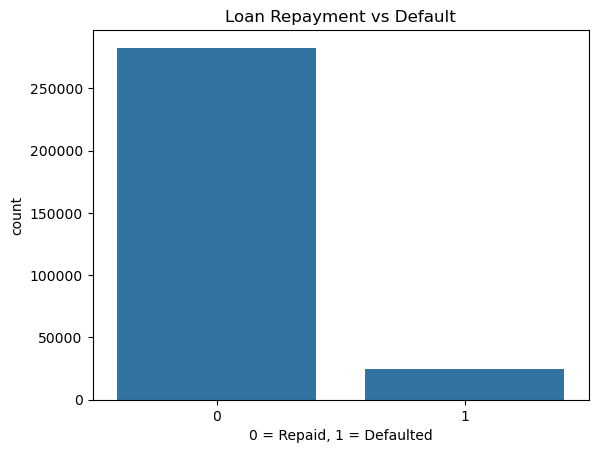

Default rate: 8.07%


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=app_train, x='TARGET')
plt.title('Loan Repayment vs Default')
plt.xlabel('0 = Repaid, 1 = Defaulted')
plt.show()

# Percentage of defaulters
default_rate = app_train['TARGET'].mean()
print(f"Default rate: {default_rate:.2%}")


In [4]:
corrs = app_train.corr(numeric_only=True)['TARGET'].sort_values(ascending=False)
print("Top Positive Correlations:\n", corrs.head(10))
print("Top Negative Correlations:\n", corrs.tail(10))


Top Positive Correlations:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64
Top Negative Correlations:
 ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64


In [5]:
print(app_train.columns.tolist())


['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

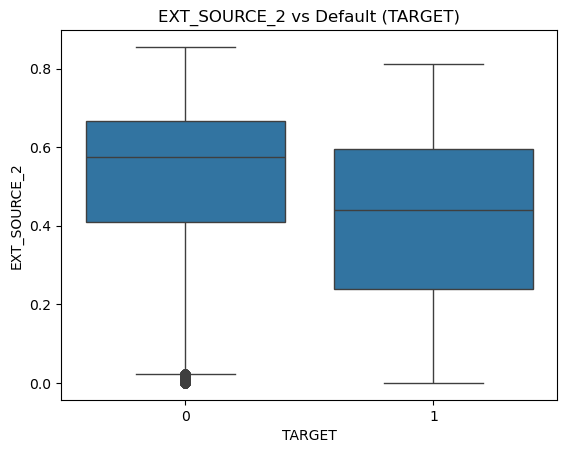

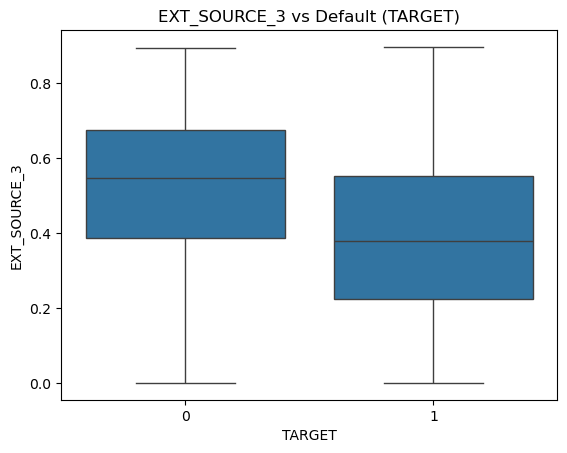

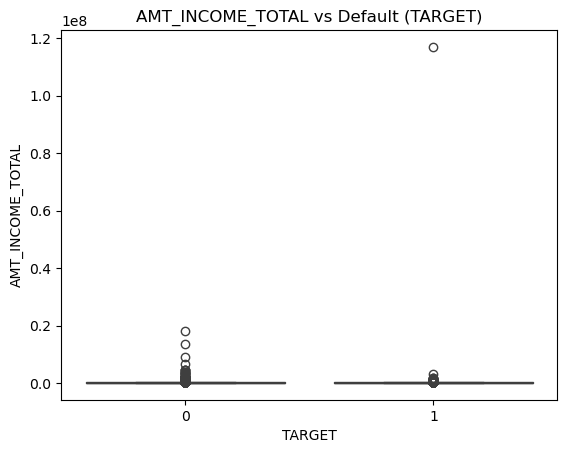

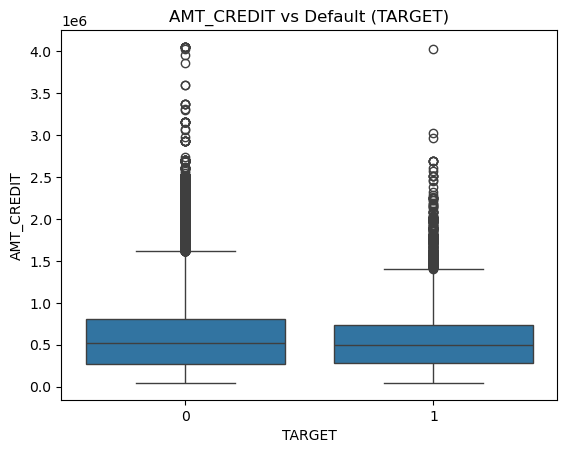

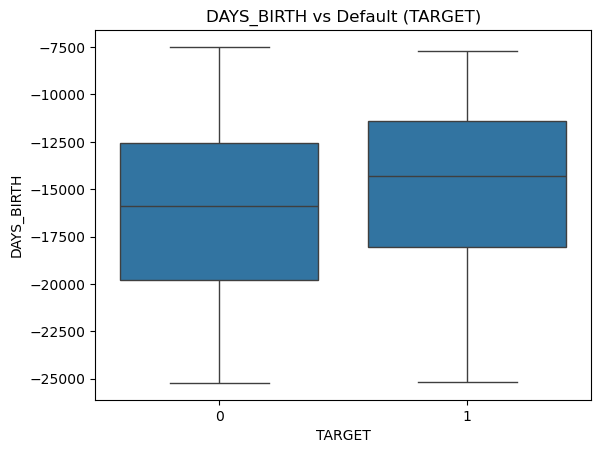

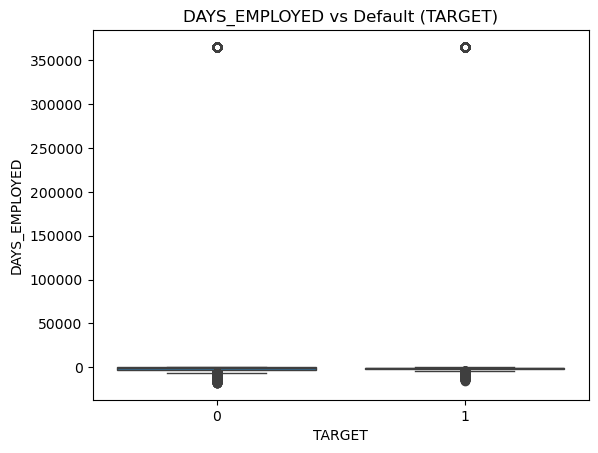

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updated features (confirmed available)
features = [
    'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT',
    'DAYS_BIRTH', 'DAYS_EMPLOYED'
]

# Plot each feature against TARGET
for feat in features:
    if feat in app_train.columns:
        sns.boxplot(x='TARGET', y=feat, data=app_train)
        plt.title(f'{feat} vs Default (TARGET)')
        plt.show()


In [7]:
# Drop columns with too many missing values
missing_threshold = 0.40
missing_percent = app_train.isnull().mean()
cols_to_drop = missing_percent[missing_percent > missing_threshold].index.tolist()

app_train.drop(columns=cols_to_drop, inplace=True)
app_test.drop(columns=cols_to_drop, inplace=True)


In [8]:
from sklearn.preprocessing import LabelEncoder

cat_cols = app_train.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    if col == 'TARGET':
        continue  # Just in case TARGET sneaks in (safety check)

    app_train[col] = app_train[col].astype(str)
    app_test[col] = app_test[col].astype(str)

    le.fit(list(app_train[col]) + list(app_test[col]))

    app_train[col] = le.transform(app_train[col])
    app_test[col] = le.transform(app_test[col])


# Feature Engineering

In [9]:
# 1. Merge bureau_balance with bureau (optional for now)
# Let's first get aggregated features from bureau

# Aggregate numeric stats from bureau
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM': ['mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': 'sum',
    'DAYS_CREDIT': 'mean',
    'CREDIT_DAY_OVERDUE': 'mean',
    'CNT_CREDIT_PROLONG': 'sum'
})

# Rename columns
bureau_agg.columns = ['bureau_' + '_'.join(col).strip() for col in bureau_agg.columns.values]
bureau_agg.reset_index(inplace=True)

# Merge with app_train and app_test
app_train = app_train.merge(bureau_agg, on='SK_ID_CURR', how='left')
app_test = app_test.merge(bureau_agg, on='SK_ID_CURR', how='left')


In [10]:
# Create new features from previous_application
prev_agg = prev_app.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['mean', 'max'],
    'AMT_CREDIT': ['mean', 'max'],
    'DAYS_DECISION': 'mean',
    'NAME_CONTRACT_STATUS': lambda x: (x == 'Refused').sum()
})

# Rename columns
prev_agg.columns = ['prev_' + '_'.join(col).strip() for col in prev_agg.columns.values]
prev_agg.reset_index(inplace=True)

# Merge into app_train/test
app_train = app_train.merge(prev_agg, on='SK_ID_CURR', how='left')
app_test = app_test.merge(prev_agg, on='SK_ID_CURR', how='left')


In [11]:
print("Train shape after joins:", app_train.shape)
print("Test shape after joins:", app_test.shape)


Train shape after joins: (307511, 87)
Test shape after joins: (48744, 86)


In [12]:
# Remove problematic characters from column names
def clean_columns(df):
    df.columns = df.columns.astype(str)
    df.columns = df.columns.str.replace('[<>\\[\\](){}]', '', regex=True)
    df.columns = df.columns.str.replace(' ', '_')
    return df

app_train = clean_columns(app_train)
app_test = clean_columns(app_test)


In [13]:
print(app_train.columns.tolist())


['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FL

# Modeling 

In [14]:
from sklearn.model_selection import train_test_split

X = app_train.drop(columns=['SK_ID_CURR', 'TARGET'])
y = app_train['TARGET']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [15]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Evaluate
auc = roc_auc_score(y_val, y_pred_proba)
print(f"✅ Validation ROC-AUC Score: {auc:.4f}")


C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:47:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Validation ROC-AUC Score: 0.7629


# Model Explainability with SHAP

In [17]:
import sys
!{sys.executable} -m pip install shap --quiet

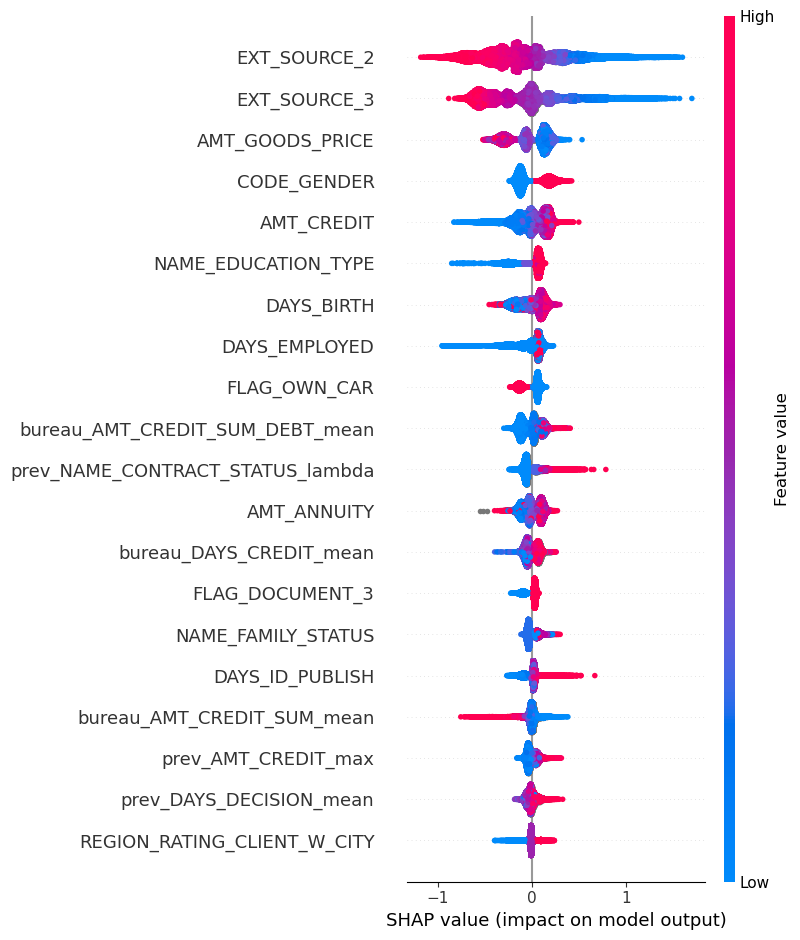

In [18]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, X_val)


In [19]:
app_train.to_csv("credit_risk_dashboard_data.csv", index=False)


In [20]:
import pandas as pd
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_val)

# Get mean absolute SHAP values
shap_df = pd.DataFrame(shap_values.values, columns=X_val.columns)
shap_mean = shap_df.abs().mean().sort_values(ascending=False).head(10)

# Prepare CSV for Power BI
shap_mean_df = shap_mean.reset_index()
shap_mean_df.columns = ['Feature', 'Mean_SHAP_Value']
shap_mean_df.to_csv("shap_importance_top10.csv", index=False)
